In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import plotly.express as px
import tensorflow as tf
import warnings
import seaborn as sns
import os
import re
warnings.simplefilter(action='ignore')

In [31]:
dados = pd.read_csv(r"D:\testekeras\super_loja.csv",sep=";",encoding="latin-1")
dados.drop_duplicates(inplace=True)
dados.sort_values('Vendas',ascending=False, inplace=True)


In [32]:
dados['Quantidade'] = dados['Quantidade'].astype(int)

In [33]:


dados[['Vendas','Desconto','Lucro']] = dados[['Vendas'
                         ,'Desconto','Lucro']].applymap(lambda k: float(str(k).replace(",",".")))


In [34]:
date_time = dados['Data do pedido'] = pd.to_datetime(dados['Data do pedido'] ,errors='coerce')


In [35]:

colunas_contagem = ['Cidade', 'Categoria', 'Modo de envio']


for col in colunas_contagem:
    contagens = dados.groupby(col).size()
    dados[f'{col}_count'] = dados[col].map(contagens)


print(dados)


      ID da fila    ID do pedido Data do pedido Data de envio  \
8323        8344  MX-2021-165260     2021-06-28    04/07/2021   
8206        8227  US-2019-123330     2019-10-19    25/10/2019   
8037        8057  US-2019-156797     2019-11-20    27/11/2019   
7972        7992  US-2021-147368     2021-12-29    04/01/2022   
7798        7818  MX-2020-167906     2020-03-12    17/03/2020   
...          ...             ...            ...           ...   
2259        2266  US-2019-136000     2019-05-15    17/05/2019   
6487        6504  US-2020-137848     2020-08-09    13/08/2020   
8462        8486  US-2021-107944     2021-10-10    12/10/2021   
5312        5329  US-2019-169712     2019-09-19    21/09/2019   
1610        1617  MX-2021-165421     2021-07-02    06/07/2021   

        Modo de envio ID do cliente     Nome do cliente  \
8323    Classe padrão      BS-11755         Bruna Sousa   
8206    Classe padrão      JG-15850        Julian Gomes   
8037    Classe padrão      BR-11065  Beatr

In [36]:

result = dados.apply(lambda col: col.sum() if pd.api.types.is_numeric_dtype(col) else col)


print(result)

ID da fila                                                      52791417
ID do pedido           8323    MX-2021-165260
8206    US-2019-123330
...
Data do pedido         8323   2021-06-28
8206   2019-10-19
8037   201...
Data de envio          8323    04/07/2021
8206    25/10/2019
8037    ...
Modo de envio          8323      Classe padrão
8206      Classe padrã...
ID do cliente          8323    BS-11755
8206    JG-15850
8037    BR-1...
Nome do cliente        8323           Bruna Sousa
8206          Julia...
Segmento               8323                        Varejo
8206       ...
Cidade                 8323            Mixco
8206    San Miguelito
80...
Estado                 8323            Guatemala
8206               P...
País/Região            8323               Guatemala
8206             ...
Região                 8323    Central
8206    Central
8037    Centra...
ID do produto          8323    MAT-AC-10004304
8206    TEC-TE-1000422...
Categoria              8323    Material de escritór

In [37]:
result.reset_index(drop = True, inplace = True)
result

0                                              52791417
1     8323    MX-2021-165260
8206    US-2019-123330
...
2     8323   2021-06-28
8206   2019-10-19
8037   201...
3     8323    04/07/2021
8206    25/10/2019
8037    ...
4     8323      Classe padrão
8206      Classe padrã...
5     8323    BS-11755
8206    JG-15850
8037    BR-1...
6     8323           Bruna Sousa
8206          Julia...
7     8323                        Varejo
8206       ...
8     8323            Mixco
8206    San Miguelito
80...
9     8323            Guatemala
8206               P...
10    8323               Guatemala
8206             ...
11    8323    Central
8206    Central
8037    Centra...
12    8323    MAT-AC-10004304
8206    TEC-TE-1000422...
13    8323    Material de escritório
8206           ...
14    8323    Eletrônicos
8206      Telefones
8037  ...
15    8323                    Hamilton Beach Geladei...
16                                        21588922.7804
17                                              

In [38]:

SELECT_COLUMNS = ['Data do pedido', 'Modo de envio', 'Cidade'
                  , 'País/Região', 'ID do produto', 'Categoria', 'Vendas', 'Quantidade', 'Desconto', 'Lucro']

dados_filtrados = dados[SELECT_COLUMNS]

print(dados_filtrados)

     Data do pedido    Modo de envio         Cidade           País/Região  \
8323     2021-06-28    Classe padrão          Mixco             Guatemala   
8206     2019-10-19    Classe padrão  San Miguelito                Panamá   
8037     2019-11-20    Classe padrão    Tegucigalpa              Honduras   
7972     2021-12-29    Classe padrão      Carrefour                 Haiti   
7798     2020-03-12    Classe padrão   San Salvador           El Salvador   
...             ...              ...            ...                   ...   
2259     2019-05-15  Primeira classe   Ciudad Acuña                México   
6487     2020-08-09    Classe padrão  Santo Domingo  República Dominicana   
8462     2021-10-10   Segunda classe        Posadas             Argentina   
5312     2019-09-19  Primeira classe       Valencia             Venezuela   
1610     2021-07-02    Classe padrão          Apopa           El Salvador   

        ID do produto               Categoria     Vendas  Quantidade  \
832

In [41]:
sample_size = 480
plot_cols = ['Vendas', 'Quantidade', 'Desconto']
plot_features = dados[plot_cols].head(sample_size)


fig = px.line(plot_features, x=plot_features.index, y=plot_cols, facet_col="variable", facet_col_wrap=1)


fig.update_layout(
    title="Gráficos de Vendas, Quantidade e Desconto",
    xaxis_title="Data",
    yaxis_title="Valor",
)


fig.show()

In [ ]:

dados_filtrados['Lucro'] = dados_filtrados['Lucro'].str.replace(',', '').str.replace('$', '').astype(float)

cortes = [-float('inf'), 0, float('inf')]
rotulos = ['Prejuízo', 'Lucro']

dados_filtrados['Resultado'] = pd.cut(dados_filtrados['Lucro'], bins=cortes, labels=rotulos)

print(dados_filtrados[['Lucro', 'Resultado']])

In [ ]:


dados_filtrados[['Vendas','Desconto','Lucro']] = dados_filtrados[['Vendas'
                         ,'Desconto','Lucro']].applymap(lambda k: float(str(k).replace(",",".")))


In [ ]:


fig = px.scatter_matrix(
    dados_filtrados,
    dimensions=['Vendas', 'Quantidade', 'Desconto', 'Lucro'],
    color='Categoria',
    title='Pairplot Seleção Caracteristicas',
    opacity=0.5,  
)


fig.update_layout(
    autosize=False,
    width=1200,  
    height=1000, 
)


fig.update_xaxes(title_font=dict(size=14), tickangle=45)
fig.update_yaxes(title_font=dict(size=14), tickangle=45)


fig.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objs as go


dados = pd.read_csv(r"D:\testekeras\super_loja.csv", sep=";", encoding="latin-1")
dados.drop_duplicates(inplace=True)
dados.sort_values('Vendas', ascending=False, inplace=True)

dados['Data do pedido'] = pd.to_datetime(dados['Data do pedido'])

dados.set_index('Data do pedido', inplace=True)

serie_temporal = dados['Vendas'].values
scaler = MinMaxScaler()
serie_temporal = scaler.fit_transform(serie_temporal.reshape(-1, 1))

train_size = int(len(serie_temporal) * 0.8)
train_data, test_data = serie_temporal[:train_size], serie_temporal[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10

train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)

X_train, y_train = train_sequences[:, :-1], train_sequences[:, -1]
X_test, y_test = test_sequences[:, :-1], test_sequences[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

y_pred = model.predict(X_test)

y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Erro Médio Quadrado: {mse}')


dates = dados.index[train_size+seq_length:]


df_resultados = pd.DataFrame({'Data do pedido': dates, 'Valor Real': y_test_original.flatten(), 'Valor Previsto': y_pred_original.flatten()})


print(df_resultados)


fig = go.Figure()


fig.add_trace(go.Scatter(x=dates, y=y_test_original.flatten(), mode='lines', name='Real'))


fig.add_trace(go.Scatter(x=dates, y=y_pred_original.flatten(), mode='lines', name='Previsto'))


fig.update_layout(title='Previsão de Vendas com RNN',
                  xaxis_title='Data do pedido',
                  yaxis_title='Vendas')

fig.show()


Epoch 1/50
257/257 [==============================] - 2s 3ms/step - loss: 0.0092
Epoch 2/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 3/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 4/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 5/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 6/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 7/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 8/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 9/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 10/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 11/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 12/50
257/257 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 13/50
257/257 [====

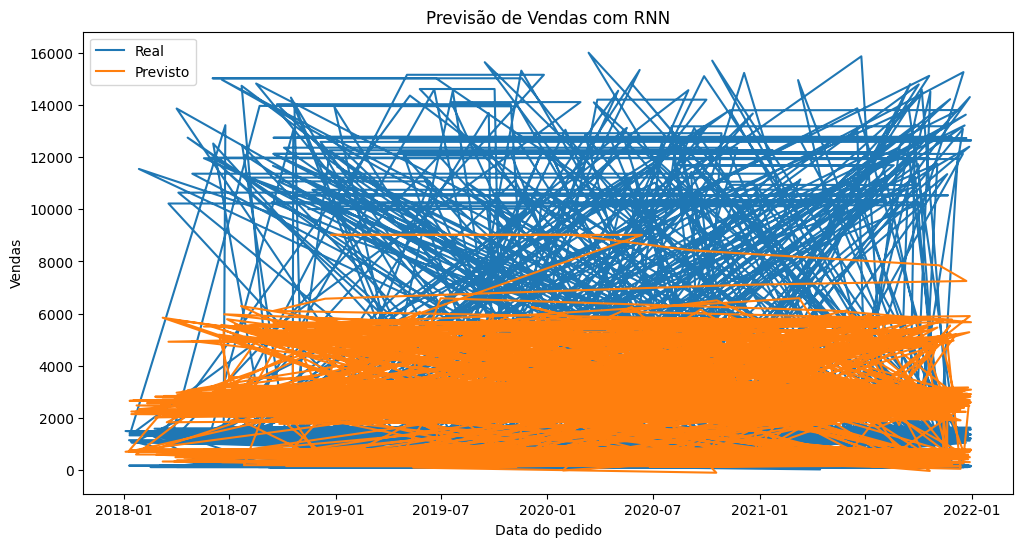

In [42]:



dados['Data do pedido'] = pd.to_datetime(dados['Data do pedido'])
dados.set_index('Data do pedido', inplace=True)


serie_temporal = dados['Vendas'].values


scaler = MinMaxScaler()
serie_temporal = scaler.fit_transform(serie_temporal.reshape(-1, 1))


train_size = int(len(serie_temporal) * 0.8)
train_data, test_data = serie_temporal[:train_size], serie_temporal[train_size:]


def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)


seq_length = 10


train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)


X_train, y_train = train_sequences[:, :-1], train_sequences[:, -1]
X_test, y_test = test_sequences[:, :-1], test_sequences[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


y_pred = model.predict(X_test)


y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test, y_pred)
print(f'Erro Médio Quadrado: {mse}')


plt.figure(figsize=(12, 6))
plt.plot(dados.index[train_size+seq_length:], y_test, label='Real')
plt.plot(dados.index[train_size+seq_length:], y_pred, label='Previsto')
plt.legend()
plt.title('Previsão de Vendas com RNN')
plt.xlabel('Data do pedido')
plt.ylabel('Vendas')
plt.show()